In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
#필요한 라이브러리 불러오기
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification

In [4]:
X, Y = make_classification(n_samples=1000, n_features=4,
                        n_informative=2, n_redundant=0,
                        random_state=0)

In [5]:
raw = datasets.load_breast_cancer()         ## sklearn에 내장된 원본 데이터 불러오기
print(raw.feature_names)   

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
data = pd.DataFrame(raw.data)               ## 독립변수 데이터 모음  
target = pd.DataFrame(raw.target)           ## 종속변수 데이터 모음
rawData = pd.concat([data,target], axis=1) 

In [7]:
rawData.columns=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry', 'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error', 'concavity error',
 'concave points error', 'symmetry error', 'fractal dimension error',
 'worst radius', 'worst texture', 'worst perimeter', 'worst area',
 'worst smoothness', 'worst compactness', 'worst concavity',
 'worst concave points', 'worst symmetry', 'worst fractal dimension'
 , 'cancer']

rawData.head(10)                   

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [8]:
x = rawData[['mean radius', 'mean texture']]
y = rawData['cancer']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0)

In [10]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('C://Users//gksquf//OneDrive//Documents//CDesing//complaints.csv//complaints.csv')
#csv파일 불러오기
df = df[['Consumer complaint narrative','Product']]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.rename(columns = {'Consumer complaint narrative':'narrative'}, inplace = True)
df.head(10)

C:\Users\gksquf\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


,narrative,Product
2,I contacted Ally on Friday XX/XX/XXXX after fa...,Vehicle loan or lease
8,Hello This complaint is against the three cred...,"Credit reporting, credit repair services, or o..."
9,I am a victim of Identity Theft & currently ha...,"Credit reporting, credit repair services, or o..."
15,Two accounts are still on my credit history af...,"Credit reporting, credit repair services, or o..."
18,Receiving daily telephone call ( s ) from XXXX...,"Credit reporting, credit repair services, or o..."
19,I have a bank of America small business credit...,Credit card or prepaid card
23,I opened a citi double cash card the beginning...,Credit card or prepaid card
24,Although I am checking for and addressing miss...,"Credit reporting, credit repair services, or o..."
32,"In an attempt to purchase concert tickets, I c...","Money transfer, virtual currency, or money ser..."
33,I am attempting to sell my home and pay off my...,Mortgage


In [11]:
df.shape


(810349, 2)

In [12]:
df.index = range(810349)
df['narrative'].apply(lambda x: len(x.split(' '))).sum()

155307300

C:\Users\gksquf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


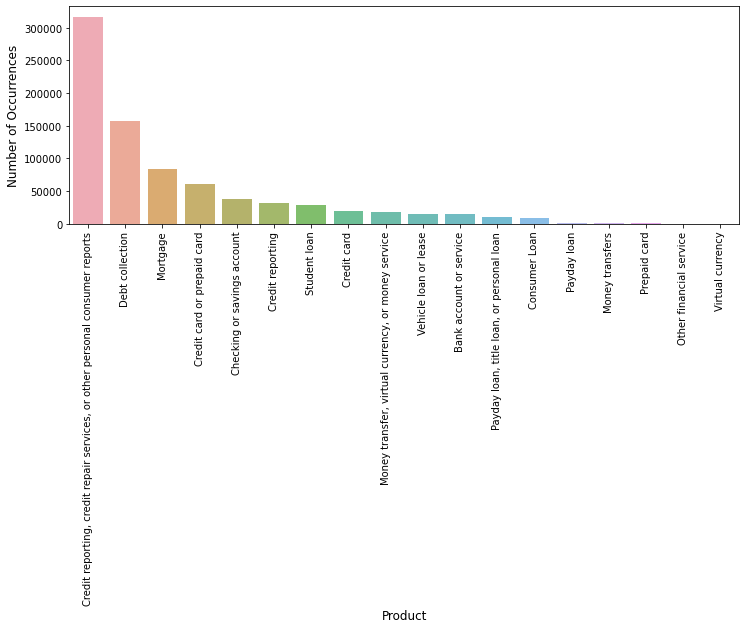

In [13]:
cnt_pro = df['Product'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [14]:
def print_complaint(index):
    example = df[df.index == index][['narrative', 'Product']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Product:', example[1])
print_complaint(12)

I was initially contacted by XXXX XXXX in Fall 2016. Equitable Acceptance has partnership with XXXX XXXX/XXXX XXXX. These corporations are scam companies " dealers '' for Equitable Acceptance. XXXX XXXX XXXX calls individuals and present a con/scam that they can enroll students in a special student loan repayment program. These corporations inform students that they qualify for loan forgiveness program and much lower monthly payments to their lenders ; which would ensure less payment out of student 's pocket and more loan being paid off/forgiven by the government. These corporations inform that the offer is only provided through their enrollment and the program enrollment will be ending soon. These corporations charge a fee for this service, in my case it was {$1800.00} in monthly direct debit amount of {$30.00} from my bank account. But these corporations convince students this is a great deal compared to how much they will save you from paying back to loan lender. Once an individual 

In [15]:
print_complaint(20)

My original mortgage at closing was about {$1800.00} I paid this amount for one ( 1 ) year. This included insurance and property taxes.

In XX/XX/XXXX, I received a shock! The mortgage company neglected to put in the MUD taxes in the note resulting in a $ XX/XX/XXXX increase in payments. This was a deceptive practice because being a retired police officer, I would not have purchased this home. I called everyone to ask why wasn't this amount put into the closing documents when my payment was estimated. No one knows the answer. It seems that I'm in this municipal district in addition to my property taxes. How in the world can that happen. anyway in order not to lose my home, I borrowed the money off my credit card and paid the taxes on the house directly. I then asked the mortgage company to adjust my escrow for this year.

Now they are threatening me with foreclosure. When I sent in my payment of {$1800.00}, they applied it to the escrow without my permission. I have sent the mortgage p

In [ ]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['narrative'] = df['narrative'].apply(cleanText)

In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['narrative']), tags=[r.Product]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['narrative']), tags=[r.Product]), axis=1)